<a href="https://colab.research.google.com/github/MasterAleksandr/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Распознавание цифр по изображениям.


In [2]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 #tf.enable_eager_execution()

2.12.0


####Вспомогательный код

In [3]:
#@title
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11490434/11490434 [==============================] - 2s 0us/step


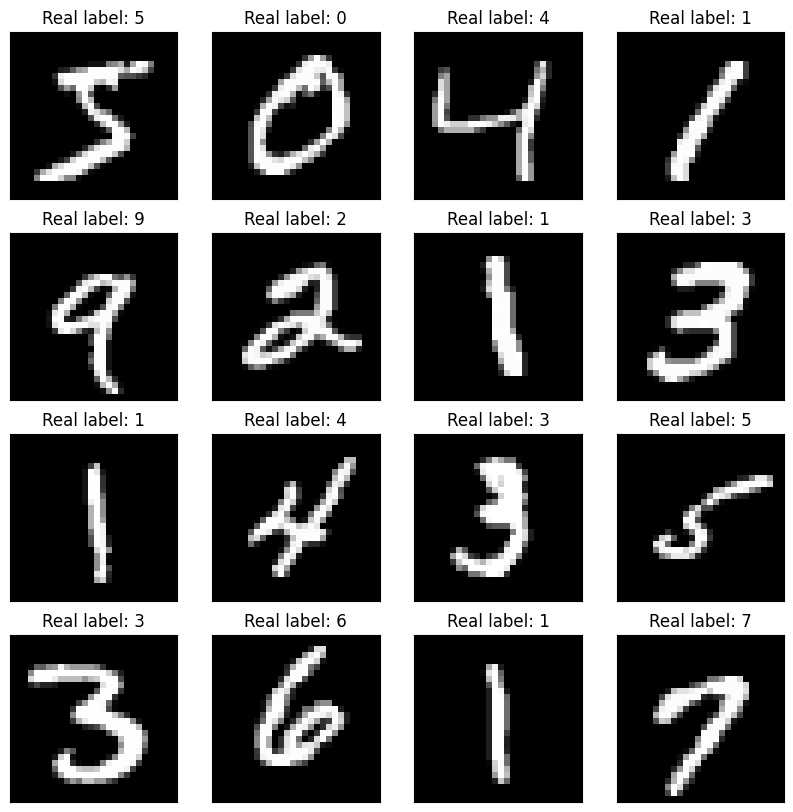

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [5]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку,
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [28]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [8]:
# < YOUR CODE STARTS HERE >
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='min')
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(150, input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.sparse_categorical_crossentropy
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[checkpoint])







# < YOUR CODE ENDS HERE >

Epoch 1/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.2572 - accuracy: 0.9269
Epoch 1: accuracy improved from inf to 0.92712, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2564 - accuracy: 0.9271 - val_loss: 0.1501 - val_accuracy: 0.9554
Epoch 2/5
1862/1875 [============================>.] - ETA: 0s - loss: 0.1100 - accuracy: 0.9673
Epoch 2: accuracy did not improve from 0.92712
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1098 - accuracy: 0.9673 - val_loss: 0.1013 - val_accuracy: 0.9696
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9779
Epoch 3: accuracy did not improve from 0.92712
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9779 - val_loss: 0.0802 - val_accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0552 - accuracy:

In [9]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

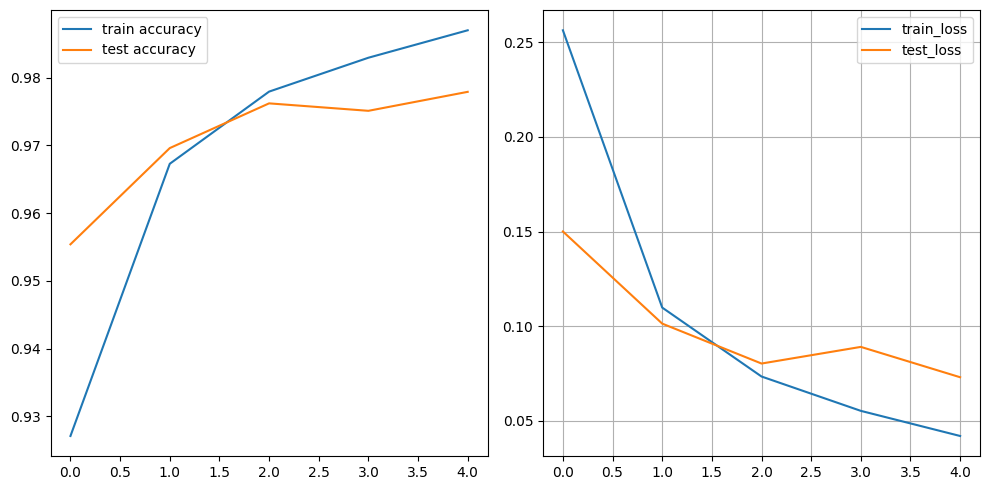

In [11]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [13]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.95

313/313 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9554
Accuracy of restored model 95.54%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

In [22]:
np.shape(restored_model.predict(x_test))

313/313 [==============================] - 1s 2ms/step


(10000, 10)

313/313 [==============================] - 1s 4ms/step


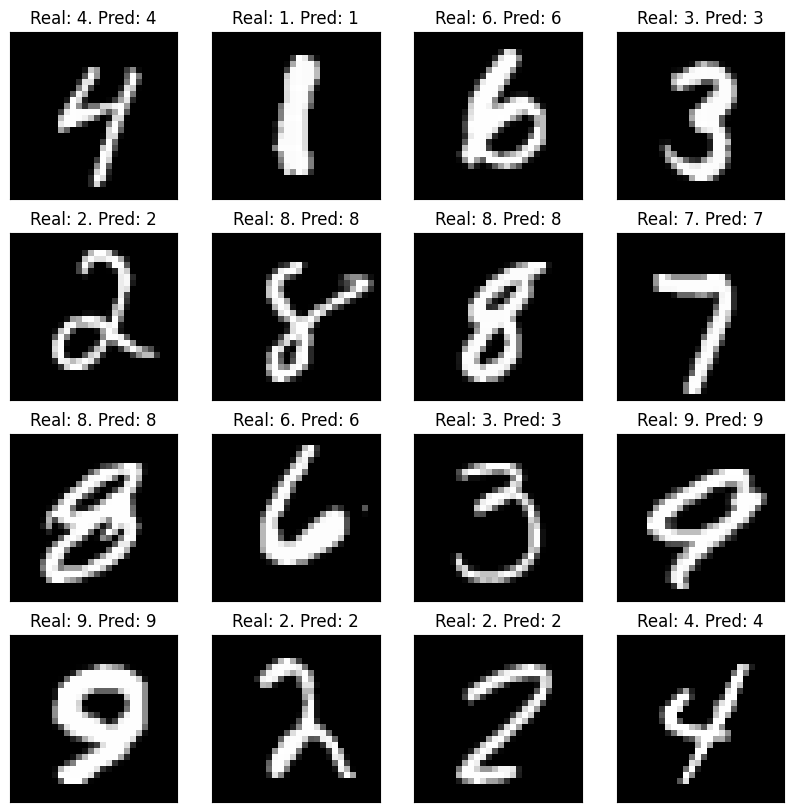

In [30]:
predicted_labels = restored_model.predict(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], np.array([np.argmax(x)for x in predicted_labels[idxs]]))